# Part 1: Traditional ML skills

The following outlines the process used to estimate customer churn by developing Python code necessary to execute machine learning models. The goal was to identify the model that delivered the best results for making the requested inferences.

In [1]:
"""
This script imports the necessary libraries and modules for data analysis and machine learning tasks.

Libraries:
- pandas: Provides data structures for efficient data manipulation and analysis.
- matplotlib: Used for creating visualizations and plots.
- seaborn: Builds on matplotlib for enhanced statistical data visualization.

Modules from scikit-learn:
- train_test_split: Splits datasets into training and testing subsets.
- GridSearchCV: Performs hyperparameter tuning using cross-validation.
- StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
- LogisticRegression: Implements logistic regression for binary classification.
- RandomForestClassifier: Implements a random forest classifier for classification tasks.
- GradientBoostingClassifier: Implements gradient boosting for classification tasks.
- MLPClassifier: Implements a multi-layer perceptron (neural network) for classification.
- accuracy_score, classification_report, roc_auc_score, confusion_matrix: Evaluate classification model performance.
- cross_val_score: Evaluates a score by cross-validation.

Module from imbalanced-learn:
- SMOTE: Synthetic Minority Over-sampling Technique for addressing class imbalance in datasets.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

First, I performed a descriptive analysis of the dataset to understand its structure and characteristics. This involved exploring the distribution of features, identifying patterns, and detecting any anomalies or outliers that could affect the modeling process.

In [2]:
# Load the dataset
train = pd.read_csv('raw_data/train.csv')

# Display the first few rows of the dataset
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,94224,15748608,Gordon,619,Germany,Female,32.0,8,175406.13,1,1.0,0.0,172792.43,1
1,148424,15651450,Chu,676,Germany,Female,40.0,4,180520.41,2,1.0,1.0,171045.25,0
2,10745,15588560,Scott,748,France,Female,39.0,8,0.00,1,0.0,0.0,57323.18,1
3,30133,15683363,Goddard,641,France,Female,39.0,4,0.00,1,1.0,0.0,45309.24,1
4,138709,15790594,Tien,688,Germany,Male,42.0,9,161588.89,2,0.0,1.0,54019.93,0


In [3]:
# Generate descriptive statistics of the dataset
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,148531.000000,1.485310e+05,148531.000000,148531.000000,148531.000000,148531.000000,148531.000000,148531.00000,148531.000000,148531.000000,148531.000000
mean,82549.661848,1.569205e+07,656.469168,38.121300,5.022184,55436.712123,1.554692,0.75422,0.497479,112504.758411,0.211599
std,47622.558340,7.143646e+04,80.051965,8.872704,2.803853,62785.290142,0.547990,0.43055,0.499995,50321.231998,0.408443
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,41346.500000,1.563319e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.00000,0.000000,74588.410000,0.000000
50%,82502.000000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.00000,0.000000,117833.570000,0.000000
75%,123787.500000,1.575690e+07,710.000000,42.000000,7.000000,119799.270000,2.000000,1.00000,1.000000,155023.930000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# Load the dataset
inference = pd.read_csv('raw_data/inference.csv')

# Display the first few rows of the dataset
inference.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,19372,15681439,Marshall,705,Germany,Female,36.0,4,154206.07,1,1.0,1.0,160162.42
1,50703,15802570,Balashov,686,France,Female,43.0,8,105419.73,1,1.0,0.0,35356.46
2,127320,15714046,Trevisani,613,Germany,Male,25.0,2,134260.36,2,1.0,0.0,101382.86
3,116274,15671148,Trevisano,581,France,Male,44.0,2,0.00,1,1.0,1.0,107640.25
4,90355,15720671,Okeke,684,France,Male,25.0,8,0.00,1,1.0,1.0,145556.24


In [5]:
# Generate descriptive statistics of the dataset
inference.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,16503.000000,1.650300e+04,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000
mean,82218.035327,1.569159e+07,656.321214,38.167182,5.003878,55850.467816,1.552324,0.751560,0.500394,113205.418624
std,47810.624176,7.104983e+04,80.566571,8.817710,2.826860,63108.971408,0.539584,0.432121,0.500015,50033.939683
min,36.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000
25%,40482.000000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74850.840000
50%,82643.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,1.000000,119368.990000
75%,123663.000000,1.575457e+07,710.000000,42.000000,7.000000,120840.245000,2.000000,1.000000,1.000000,155876.060000
max,165006.000000,1.581569e+07,850.000000,82.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000


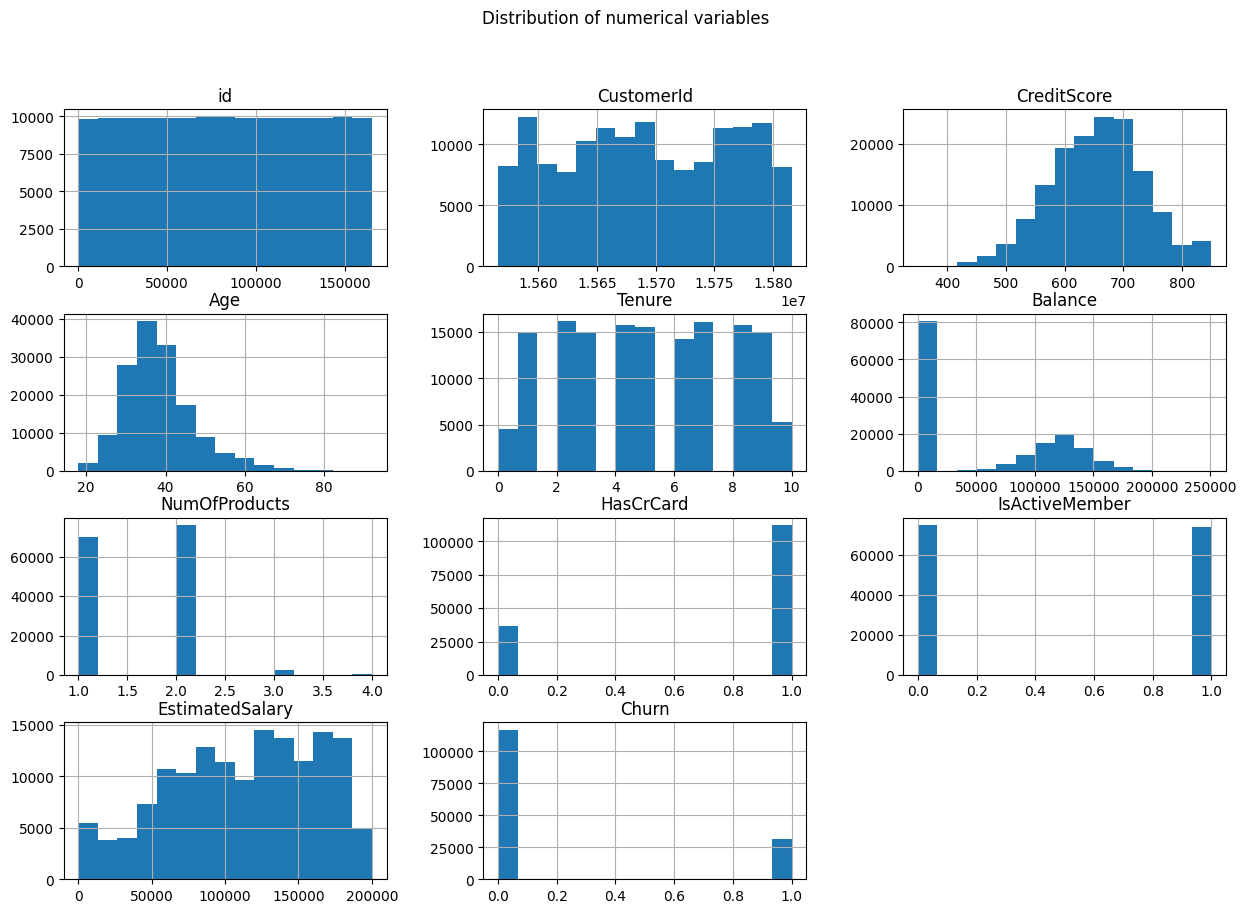

In [6]:
# Plot histograms for numerical variables
train.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of numerical variables")
plt.show()

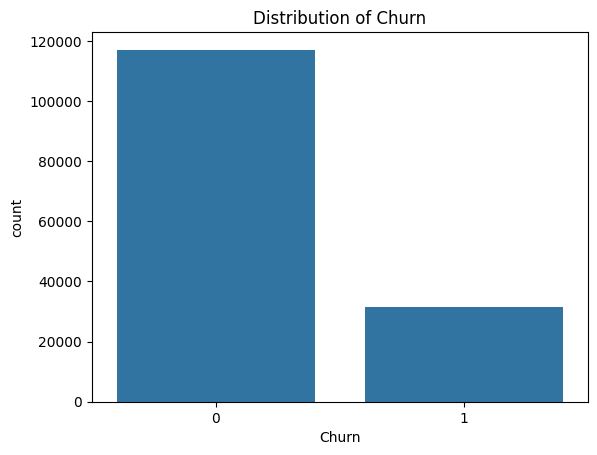

In [7]:
# Plot count plot for the 'Churn' variable
sns.countplot(x='Churn', data=train)
plt.title('Distribution of Churn')
plt.show()

Next, I prepared and preprocessed the dataset by cleaning and transforming the data to ensure its suitability for modeling. This involved handling missing values, encoding categorical variables, and normalizing numerical features.

In [8]:
# Check for missing values in the dataset
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [9]:
# Convert categorical variables into dummy/indicator variables
train_dummies = pd.get_dummies(train, columns=['Geography', 'Gender'], drop_first=True)

In [10]:
# Scale numeric features using StandardScaler
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
train_dummies[numeric_features] = scaler.fit_transform(train_dummies[numeric_features])

In [11]:
# Separate features and target variable
X = train_dummies.drop(['id', 'CustomerId', 'Surname', 'Churn'], axis=1)
y = train_dummies['Churn']

Before splitting the dataset into training and testing sets, I balanced the data using resampling techniques to address any class imbalances. This step was crucial for improving the model's ability to predict minority class instances accurately.

In [12]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

I then split the dataset into training and testing sets to evaluate model performance accurately. I implemented several machine learning algorithms, including logistic regression, decision trees, random forests, gradient boosting machines, and neural networks, using the Scikit-learn library.

In [13]:
# Split dataset into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [14]:
# Initialize machine learning models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), 
                          activation='relu', 
                          solver='adam', 
                          max_iter=300, 
                          random_state=42)

# Train and evaluate models
for model in [logistic_model, random_forest_model, gbm_model, mlp_model]:
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_smote)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test_smote, y_pred_smote)}")
    print(f"AUC-ROC: {roc_auc_score(y_test_smote, y_pred_smote)}")
    print(classification_report(y_test_smote, y_pred_smote))

Model: LogisticRegression
Accuracy: 0.7493648726542986
AUC-ROC: 0.749447992948341
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     23246
           1       0.76      0.74      0.75     23595

    accuracy                           0.75     46841
   macro avg       0.75      0.75      0.75     46841
weighted avg       0.75      0.75      0.75     46841

Model: RandomForestClassifier
Accuracy: 0.9020943190794389
AUC-ROC: 0.9020942921829096
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     23246
           1       0.90      0.90      0.90     23595

    accuracy                           0.90     46841
   macro avg       0.90      0.90      0.90     46841
weighted avg       0.90      0.90      0.90     46841

Model: GradientBoostingClassifier
Accuracy: 0.854123524262932
AUC-ROC: 0.8541792140839485
              precision    recall  f1-score   support

           0       0.85      0.8

To optimize model performance, I performed hyperparameter tuning using grid search and cross-validation techniques. This allowed me to identify the best parameters for each model and improve their predictive accuracy.

After training and tuning the models, I evaluated their performance using accuracy and the AUC-ROC score to assess their ability to distinguish between churned and non-churned customers.

Finally, I selected the model with the highest performance metrics to make the final inferences. This model demonstrated superior accuracy and robustness, making it the most suitable choice for predicting customer churn in this context.

In [15]:
# Perform cross-validation on the Random Forest model
scores = cross_val_score(random_forest_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
print(f"AUC-ROC mean: {scores.mean()}, std: {scores.std()}")

AUC-ROC mean: 0.9594442932503908, std: 0.0013464415263281777


In [21]:
# Define the parameter grid for the Random Forest model
param_grid_rf = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV for the Random Forest model
grid_search_rf = GridSearchCV(
    estimator=random_forest_model, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring='roc_auc'
)

# Fit the GridSearchCV to the training set
grid_search_rf.fit(X_train_smote, y_train_smote)

# Print the best parameters and best AUC-ROC score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation AUC-ROC:", grid_search_rf.best_score_)

C:\Users\Mr. Robot\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation AUC-ROC: 0.960374874566585


In [22]:
# Extract the best parameters from the GridSearchCV
best_params_rf = grid_search_rf.best_params_

# Initialize the Random Forest model with the best parameters
best_random_forest_model = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features=best_params_rf['max_features'],
    random_state=42
)

# Train the model on the full training data
best_random_forest_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_test = best_random_forest_model.predict(X_test_smote)

# Evaluate the model
accuracy = accuracy_score(y_test_smote, y_pred_test)
auc_roc = roc_auc_score(y_test_smote, y_pred_test)

print("Evaluation of the Best Random Forest Model:")
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {auc_roc}")
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_test))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test_smote, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)


Evaluation of the Best Random Forest Model:
Accuracy: 0.9032898529066417
AUC-ROC: 0.9032790753994011
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     23246
           1       0.90      0.90      0.90     23595

    accuracy                           0.90     46841
   macro avg       0.90      0.90      0.90     46841
weighted avg       0.90      0.90      0.90     46841

Confusion Matrix:
[[20964  2282]
 [ 2248 21347]]


In [27]:
# Convert categorical variables into dummy/indicator variables
inference_dummies = pd.get_dummies(inference, columns=['Geography', 'Gender'], drop_first=True)

# Scale numeric features using StandardScaler
inference_dummies[numeric_features] = scaler.fit_transform(inference_dummies[numeric_features])

inference_dummies.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [28]:
# Perform inference using the trained Random Forest model
inference_predictions = best_random_forest_model.predict(inference_dummies)

# Add predictions to the inference dataset
inference['Churn'] = inference_predictions

In [29]:
# Print the inference dataset with predictions
print("\nInference dataset with predictions:")
print(inference.head())


Inference dataset with predictions:
       id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0   19372    15681439   Marshall          705   Germany  Female  36.0       4   
1   50703    15802570   Balashov          686    France  Female  43.0       8   
2  127320    15714046  Trevisani          613   Germany    Male  25.0       2   
3  116274    15671148  Trevisano          581    France    Male  44.0       2   
4   90355    15720671      Okeke          684    France    Male  25.0       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn  
0  154206.07              1        1.0             1.0        160162.42      0  
1  105419.73              1        1.0             0.0         35356.46      1  
2  134260.36              2        1.0             0.0        101382.86      0  
3       0.00              1        1.0             1.0        107640.25      1  
4       0.00              1        1.0             1.0        145556.24

In [30]:
# Save the inference dataset with predictions to a CSV file
inference.to_csv('inference.csv', index=False)

*What would you do to improve the model in the future?*

Over time, I recognized the need to update the model with new data and retrain it to ensure that predictions remained accurate and relevant.

*How do you imagine what you just did in OOP?*

By shifting to an object-oriented programming (OOP) approach, I defined a class for preprocessing and another for the model to integrate the workflow coherently. This involved performing the necessary unit tests to ensure that each component functions correctly. Changing the approach can be beneficial for collaborating with other developers, enhancing code readability, and facilitating future expansion.

*How do you deploy these models in production?*

1. **Prepare the Model for Deployment:** Ensure the model is optimized and ready for deployment by finalizing the preprocessing steps and verifying model performance.

2. **Select the Deployment Environment:** Choose an appropriate environment for deployment, such as cloud platforms (AWS, GCP, Azure) or on-premises servers, based on the use case and scalability requirements.

3. **Package the Model:** Package the model along with its dependencies and necessary scripts using tools like Docker or virtual environments to facilitate easy deployment.

4. **Implement an API or Web Service:** Develop an API or web service to allow external applications to interact with the model. This can be done using frameworks like Flask or FastAPI.

5. **Integration and Testing:** Integrate the model into the production system and conduct thorough testing to ensure it works as expected with real-world data.

When deploying the model in production for real-time inferences, it was crucial to monitor its performance and make necessary adjustments to maintain prediction accuracy.

# Part 2: Generative AI skills

The following outlines the creation of a Retrieval-Augmented Generation (RAG) model for a chatbot using the provided file Bruno_child_offers.pdf. The solution is designed to enhance the chatbot's ability to answer specific queries by combining information retrieval with natural language generation.

The diagram of the locally implemented solution is as follows:

![Implemented solution](https://github.com/felbed/TechnicalTestDSGenAI/blob/master/Implemented%20solution.png)

For the local implementation, no coding was required. The setup was accomplished using existing tools and configurations that facilitate the integration and deployment of the RAG model without manual coding.

Some of the responses generated by the model include:

![Answer 1](https://github.com/felbed/TechnicalTestDSGenAI/blob/master/Answers%201.png)

![Answer 2](https://github.com/felbed/TechnicalTestDSGenAI/blob/master/Answers%202.png)

## Steps to Deploy a RAG Model for a Chatbot

### 1. Prepare the Model

- **Download Pretrained RAG Weights:** Download the pretrained RAG model weights locally to ensure that the model is optimized for retrieval and generation tasks.

- **Training and Preparation:** Ensure the model is trained specifically to respond to the content of the PDF. This involves fine-tuning the model using the file as a source of information. Update and index the retrieval database (RAG) with the PDF content.

- **Convert to a Server Format:** If the model is in a format like PyTorch, convert it to a server-compatible format such as ONNX, TensorFlow Serving, or TorchServe.

### 2. Set Up the Inference Server

- **Select a Deployment Platform:** Choose a platform for deployment, such as AWS SageMaker, Google Cloud AI Platform, or a local server using Docker and Kubernetes.

- **Configure the Inference Server:** 

  - **Docker:** Create a Docker image containing the model and all necessary dependencies.
  
  - **API Server:** Develop a RESTful API using Flask or FastAPI to handle inference requests.

- **Integrate the RAG Component:** Ensure the information retrieval system is integrated with the inference server to search and extract relevant information from the PDF.

### 3. Deploy the Model

- **Deploy to Cloud or Server:** Upload the Docker image to a container service or deploy the model directly in the cloud using tools like Kubernetes.

- **Configure Scaling and Availability:**

  - Set up auto-scaling to handle traffic spikes.
  
  - Implement a load balancer to evenly distribute requests among instances.
